In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load data
df = pd.read_csv('local_training_data/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# data exploration
len(df)

7043

In [4]:
# data preparation / data exploratory analysis
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# show fields and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# data preparation / data cleaning
def convert_fill_numeric(column: str, df: pd.DataFrame, value: float = 0) -> pd.Series:
    return pd.to_numeric(df[column], errors='coerce').fillna(value)

In [7]:
df['TotalCharges'] = convert_fill_numeric('TotalCharges', df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# data preparation / normalization
def normalize_column_names(df: pd.DataFrame) -> pd.DataFrame:
    df.columns = df.columns.str.lower().str.replace(' ', '_', regex=False)
    return df

In [10]:
df = normalize_column_names(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [12]:
def get_string_columns(df: pd.DataFrame) -> list[str]:
    return list(df.dtypes[df.dtypes == 'object'].index)

In [13]:
string_columns = get_string_columns(df)
string_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [14]:
def normalize_string_column_values(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    for column in columns:
        df[column] = df[column].str.lower().str.replace(' ', '_', regex=False)
    return df

In [15]:
df = normalize_string_column_values(df, string_columns)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [16]:
# data preparation / create the target column for binary classification
df.churn = (df.churn == 'yes').astype(int)

In [17]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [18]:
# data preparation / prepare the dataset
# split the dataset
from sklearn.model_selection import train_test_split

In [19]:
# categorize the columns
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
target = ['churn']

In [20]:
df = df[categorical + numerical + target]

In [21]:
df.head()

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,tenure,monthlycharges,totalcharges,churn
0,female,0,yes,no,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,1,29.85,29.85,0
1,male,0,no,no,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,34,56.95,1889.50,0
2,male,0,no,no,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,2,53.85,108.15,1
3,male,0,no,no,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),45,42.30,1840.75,0
4,female,0,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,2,70.70,151.65,1


In [22]:
# train and test set
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

# train and validation set
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [23]:
# target
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [24]:
# features
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [25]:
df_train_full.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
tenure              0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [26]:
df_train_full.head()

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,tenure,monthlycharges,totalcharges,churn
1814,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,12,19.70,258.35,0
5946,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic),42,73.90,3160.55,1
3881,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic),71,65.15,4681.75,0
2389,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check,71,85.45,6300.85,0
3676,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check,30,70.40,2044.75,0


In [27]:
# data preparation / data analysis
# analyze the target if it's imbalanced
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [28]:
# data preparation/ importance / categorical columns
def explain_categorical_features_positive(df: pd.DataFrame, categorical_columns: list[str], target_column: str):
    global_mean = df[target_column].mean()

    for col in categorical_columns:
        df_group = df.groupby(by=col)[target_column].agg(['mean'])
        df_group['diff'] = df_group['mean'] - global_mean
        df_group['rate'] = df_group['mean'] / global_mean
        print(df_group)

In [29]:
explain_categorical_features_positive(df_train_full, categorical, 'churn')

            mean      diff      rate
gender                              
female  0.276824  0.006856  1.025396
male    0.263214 -0.006755  0.974980
                   mean      diff      rate
seniorcitizen                              
0              0.242270 -0.027698  0.897403
1              0.413377  0.143409  1.531208
             mean      diff      rate
partner                              
no       0.329809  0.059841  1.221659
yes      0.205033 -0.064935  0.759472
                mean      diff      rate
dependents                              
no          0.313760  0.043792  1.162212
yes         0.165666 -0.104302  0.613651
                  mean      diff      rate
phoneservice                              
no            0.241316 -0.028652  0.893870
yes           0.273049  0.003081  1.011412
                      mean      diff      rate
multiplelines                                 
no                0.257407 -0.012561  0.953474
no_phone_service  0.241316 -0.028652  0.893870


In [30]:
from sklearn.metrics import mutual_info_score

# data preparation / mutual information
def print_mutual_information(df: pd.DataFrame, categorical_columns: list[str], target_column: str):
    def calculate_mi(series):
        return mutual_info_score(series, df[target_column])

    df_mi = df[categorical_columns].apply(calculate_mi)
    df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
    print(df_mi)

In [31]:
print_mutual_information(df_train_full, categorical, 'churn')

                        MI
contract          0.098320
onlinesecurity    0.063085
techsupport       0.061032
internetservice   0.055868
onlinebackup      0.046923
deviceprotection  0.043453
paymentmethod     0.043210
streamingtv       0.031853
streamingmovies   0.031581
paperlessbilling  0.017589
dependents        0.012346
partner           0.009968
seniorcitizen     0.009410
multiplelines     0.000857
phoneservice      0.000229
gender            0.000117


In [32]:
# data preparation / correlation
def compute_correlation(df: pd.DataFrame, numerical_columns: list[str], target_column: str):
    df_corr = df[numerical_columns].corrwith(df[target_column])
    df_corr = df_corr.sort_values(ascending=False).to_frame(name='Correlation')
    return df_corr

In [33]:
res = compute_correlation(df_train_full, numerical, 'churn')
print(res)

                Correlation
monthlycharges     0.196805
totalcharges      -0.196353
tenure            -0.351885


In [34]:
# feature engineer / encoding and building X matrix
def to_dict(df: pd.DataFrame, columns: list[str]) -> list[dict]:
    return df[columns].to_dict(orient='records')

In [35]:
train_dict = to_dict(df_train, categorical + numerical)
print(type(train_dict))
print(train_dict[:2])

<class 'list'>
[{'gender': 'male', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'no', 'phoneservice': 'yes', 'multiplelines': 'no', 'internetservice': 'dsl', 'onlinesecurity': 'yes', 'onlinebackup': 'yes', 'deviceprotection': 'yes', 'techsupport': 'yes', 'streamingtv': 'yes', 'streamingmovies': 'yes', 'contract': 'two_year', 'paperlessbilling': 'yes', 'paymentmethod': 'bank_transfer_(automatic)', 'tenure': 71, 'monthlycharges': 86.1, 'totalcharges': 6045.9}, {'gender': 'female', 'seniorcitizen': 1, 'partner': 'yes', 'dependents': 'no', 'phoneservice': 'yes', 'multiplelines': 'yes', 'internetservice': 'fiber_optic', 'onlinesecurity': 'no', 'onlinebackup': 'no', 'deviceprotection': 'yes', 'techsupport': 'no', 'streamingtv': 'yes', 'streamingmovies': 'yes', 'contract': 'one_year', 'paperlessbilling': 'yes', 'paymentmethod': 'credit_card_(automatic)', 'tenure': 60, 'monthlycharges': 100.5, 'totalcharges': 6029.0}]


In [36]:
from sklearn.feature_extraction import DictVectorizer

def get_dict_vectorizer():
    return DictVectorizer(sparse=False)

In [37]:
dv = get_dict_vectorizer()

In [38]:
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [39]:
X_train = dv.transform(train_dict)

In [40]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

<class 'numpy.ndarray'>
(3774, 45)
[0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 8.6100e+01 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 7.1000e+01 6.0459e+03]


In [41]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [42]:
val_dict = to_dict(df_val, categorical + numerical)
X_val = dv.transform(val_dict)

In [43]:
print(val_dict[0])
print(X_val[0])

{'gender': 'male', 'seniorcitizen': 1, 'partner': 'yes', 'dependents': 'no', 'phoneservice': 'yes', 'multiplelines': 'no', 'internetservice': 'dsl', 'onlinesecurity': 'yes', 'onlinebackup': 'no', 'deviceprotection': 'yes', 'techsupport': 'no', 'streamingtv': 'yes', 'streamingmovies': 'no', 'contract': 'month-to-month', 'paperlessbilling': 'no', 'paymentmethod': 'bank_transfer_(automatic)', 'tenure': 19, 'monthlycharges': 66.4, 'totalcharges': 1286.05}
[1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 6.64000e+01 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 1.90000e+01 1.28605e

In [44]:
# train the model
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [46]:
y_pred = model.predict_proba(X_val)[:, 1]
print(y_pred[:2])
churn = (y_pred >= 0.5).astype(int)
print(churn[:2])

[0.23491332 0.26887312]
[0 0]


In [47]:
(y_val==churn).mean()

0.8016129032258065

In [48]:
# explain the model
def explain_logistic_regression(model, features_names: list[str]):
    return dict(zip(features_names, model.coef_[0].round(3)))

In [49]:
explain_logistic_regression(model, dv.feature_names_)

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In [50]:
customer = {
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [51]:
X_test = dv.transform([customer])

In [52]:
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [53]:
# 7% to churn = 0.07332039
model.predict_proba(X_test)

array([[0.92667961, 0.07332039]])

In [54]:
# evaluate the model using validation set
from sklearn.metrics import accuracy_score

In [55]:
# evaluate accuracy on different thresholds
thresholds = np.linspace(0, 1, 11)
print(type(thresholds))
print(thresholds)

<class 'numpy.ndarray'>
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [56]:
for t in thresholds:
   churn = y_pred >= t
   acc = accuracy_score(y_val, churn)
   print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


In [57]:
# lest's visualize
thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)

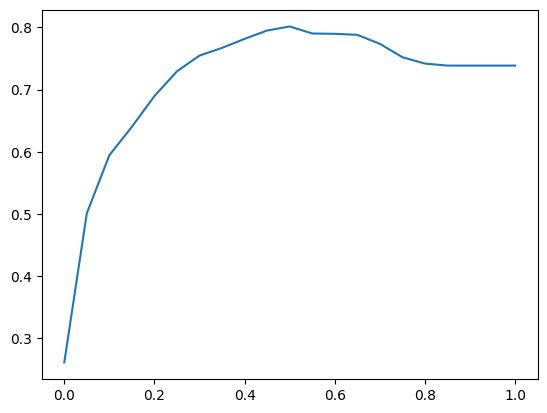

In [58]:
plt.plot(thresholds, accuracies)
plt.show()

In [59]:
# dummy model
size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [60]:
accuracy_score(baseline, y_val)

0.7387096774193549

In [61]:
y_pred[:10]

array([0.23491332, 0.26887312, 0.3194535 , 0.36518723, 0.04552555,
       0.440171  , 0.01825142, 0.11324025, 0.00606996, 0.1930139 ])

In [62]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

true_positive = (predict_positive & actual_positive)
true_negative = (predict_negative & actual_negative)
false_negative = (predict_negative & actual_positive)
false_positive = (predict_positive & actual_negative)

true_positive_total = true_positive.sum()
true_negative_total = true_negative.sum()
false_negative_total = false_negative.sum()
false_positive_total = false_positive.sum()

confusion_table = np.array(
    [[true_negative_total, false_positive_total],
     [false_negative_total, true_positive_total]]
)

In [63]:
confusion_table

array([[1202,  172],
       [ 197,  289]])

In [64]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

In [65]:
def compute_metrics_proba(y_true: np.ndarray, y_pred_proba: np.ndarray, threshold: float = 0.5) -> np.ndarray:
    predict_positive = (y_pred_proba >= threshold)
    predict_negative = (y_pred_proba < threshold)
    actual_positive = (y_true == 1)
    actual_negative = (y_true == 0)

    true_positive = (predict_positive & actual_positive)
    true_negative = (predict_negative & actual_negative)
    false_negative = (predict_negative & actual_positive)
    false_positive = (predict_positive & actual_negative)

    true_positive_total = true_positive.sum()
    true_negative_total = true_negative.sum()
    false_negative_total = false_negative.sum()
    false_positive_total = false_positive.sum()

    return np.array([true_positive_total, true_negative_total, false_negative_total, false_positive_total])

In [66]:
true_positive_total, true_negative_total, false_negative_total, false_positive_total = compute_metrics_proba(y_val, y_pred)
print(true_positive_total, true_negative_total, false_negative_total, false_positive_total)

289 1202 197 172


In [67]:
def compute_precision_proba(y_true: np.ndarray, y_pred_proba: np.ndarray, threshold: float = 0.5) -> float:
    true_positive_total, _, _, false_positive_total = compute_metrics_proba(y_true, y_pred_proba, threshold)
    return true_positive_total / (true_positive_total + false_positive_total)

In [68]:
compute_precision_proba(y_val, y_pred)

0.6268980477223427

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

def compute_precision_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return precision_score(y_true, y_pred)

def compute_recall_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return recall_score(y_true, y_pred)

In [70]:
compute_precision_score(y_val, y_pred >=0.5)

0.6268980477223427

In [71]:
def compute_recall_proba(y_true: np.ndarray, y_pred_proba: np.ndarray, threshold: float = 0.5) -> float:
    true_positive_total, _, false_negative_total, _ = compute_metrics_proba(y_true, y_pred_proba, threshold)
    return true_positive_total / (true_positive_total + false_negative_total)

In [72]:
compute_recall_proba(y_val, y_pred)

0.5946502057613169

In [73]:
compute_recall_score(y_val, y_pred>=0.5)

0.5946502057613169

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_auc_curve(y_true, y_pred_prob):
    """
    Plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC).

    This function generates a ROC curve for the given true labels and predicted probabilities.
    The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) 
    and the false positive rate (1-specificity) for different threshold values. The AUC provides a single 
    metric to summarize the performance of the classifier.

    Parameters:
    -----------
    y_true : array-like of shape (n_samples,)
        True labels of the data.
    y_pred_prob : array-like of shape (n_samples,)
        Predicted probabilities for the positive class.

    Returns:
    --------
    None
        This function does not return any value. It displays the ROC curve plot with the AUC.

    Example:
    --------
    y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
    y_pred_prob = [0.8, 0.6, 0.9, 0.7, 0.4, 0.6, 0.3, 0.5, 0.8, 0.2]
    plot_roc_auc(y_true, y_pred_prob)
    """
    fpr, tpr, _ = roc_curve(y_true,  y_pred_prob)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], '--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

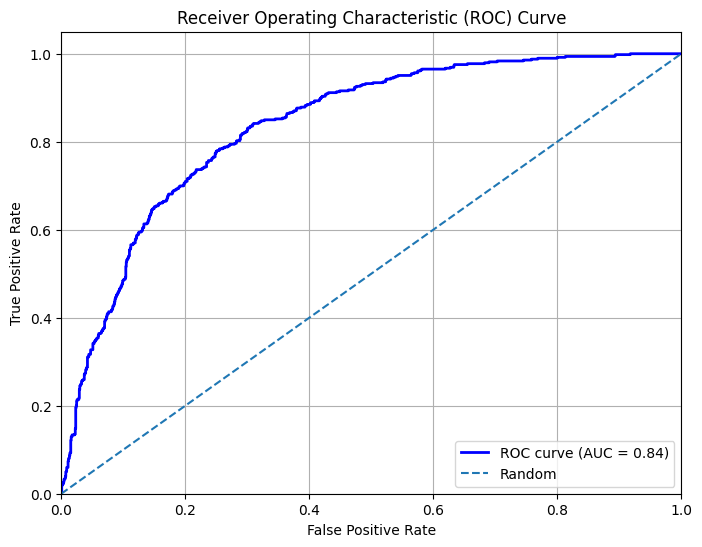

In [75]:
plot_roc_auc_curve(y_val, y_pred)

In [76]:
def train(df_train, y_train):
    train_dict = to_dict(df_train, categorical + numerical)
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    return dv, model

In [77]:
def predict(df, dv, model):
    lst = to_dict(df, categorical + numerical)
    X = dv.transform(lst)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [78]:
y_train_full = df_train_full.churn.values

In [79]:
del df_train_full['churn']

In [80]:
df_train_full[:2]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,tenure,monthlycharges,totalcharges
1814,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,12,19.7,258.35
5946,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic),42,73.9,3160.55


In [83]:
# K-fold cross-validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

aucs = []
for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    y_train = y_train_full[train_idx]
    y_val = y_train_full[val_idx]

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

print(aucs)

[0.8493392490816277, 0.8413366336633662, 0.8590269587894291, 0.8330260883877869, 0.8242400744416873, 0.840959040959041, 0.8437154021491371, 0.8223355471220746, 0.8445679561286498, 0.8611811367685119]


In [84]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


In [85]:
# Finding best parameters
def train(df_train, y_train, C):
    train_dict = to_dict(df_train, categorical + numerical)
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)
    return dv, model

In [88]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)
for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
        y_train = y_train_full[train_idx]
        y_val = y_train_full[val_idx]
    
        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.840 ± 0.009
C=0.1, auc = 0.841 ± 0.007
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


In [89]:
# train the model with the whole train and validate with the hold-out test
dv, model = train(df_train_full, y_train_full, 0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858


In [90]:
# prediction
customer = {
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [91]:
df = pd.DataFrame([customer])
y_pred = predict(df, dv, model)
print(y_pred)

[0.05960564]
